In [16]:
#Original Copyright © 2022, Xanadu Quantum Technologies, Inc, executed by vijaymohire 
#Used for non-commercial educational purpose only. More details at: https://pennylane.ai/qml/demos/tutorial_photonics.html 

In [17]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [18]:
dev = qml.device("default.gaussian", wires=1, shots=1000)

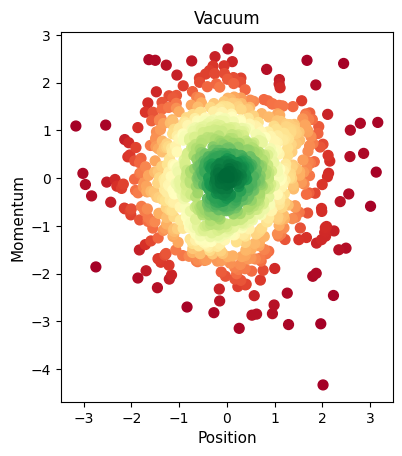

In [19]:
@qml.qnode(dev)
def vacuum_measure_x():
    return qml.sample(qml.X(0))  # Samples X quadratures


@qml.qnode(dev)
def vacuum_measure_p():
    return qml.sample(qml.P(0))  # Samples P quadrature


# Sample measurements in phase space
x_sample = vacuum_measure_x().numpy()
p_sample = vacuum_measure_p().numpy()

# Import some libraries for a nicer plot
from scipy.stats import gaussian_kde
from numpy import vstack as vstack

# Point density calculation
xp = vstack([x_sample, p_sample])
z = gaussian_kde(xp)(xp)

# Sort the points by density
sorted = z.argsort()
x, y, z = x_sample[sorted], p_sample[sorted], z[sorted]

# Plot
fig, ax = plt.subplots()
ax.scatter(x, y, c = z, s = 50, cmap="RdYlGn")
plt.title("Vacuum", fontsize=12)
ax.set_ylabel("Momentum", fontsize = 11)
ax.set_xlabel("Position", fontsize = 11)
ax.set_aspect("equal", adjustable = "box")
plt.show()

In [20]:
dev_exact = qml.device("default.gaussian", wires=1)  # No explicit shots gives analytic calculations


@qml.qnode(dev_exact)
def vacuum_mean_x():
    return qml.expval(qml.X(0))  # Returns exact expecation value of x


@qml.qnode(dev_exact)
def vacuum_mean_p():
    return qml.expval(qml.P(0))  # Returns exact expectation value of p


@qml.qnode(dev_exact)
def vacuum_var_x():
    return qml.var(qml.X(0))  # Returns exact variance of x


@qml.qnode(dev_exact)
def vacuum_var_p():
    return qml.var(qml.P(0))  # Returns exact variance of p


# Print calculated statistical quantities
print("Expectation value of x-quadrature: {}".format(vacuum_mean_x()))
print("Expectation value of p-quadrature: {}".format(vacuum_mean_p()))
print("Variance of x-quadrature: {}".format(vacuum_var_x()))
print("Variance of p-quadrature: {}".format(vacuum_var_p()))

Expectation value of x-quadrature: 0.0
Expectation value of p-quadrature: 0.0
Variance of x-quadrature: 1.0
Variance of p-quadrature: 1.0


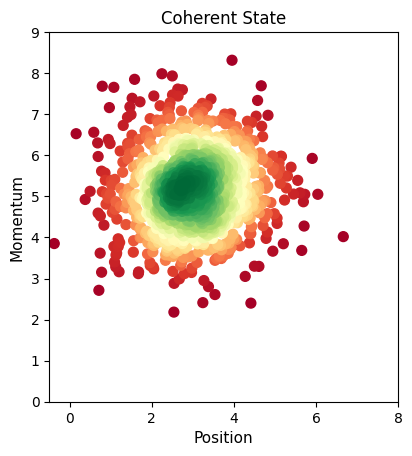

In [21]:
@qml.qnode(dev)
def measure_coherent_x(alpha, phi):
    qml.CoherentState(alpha, phi, wires=0)  # Prepares coherent state
    return qml.sample(qml.X(0))  # Measures X quadrature


@qml.qnode(dev)
def measure_coherent_p(alpha, phi):
    qml.CoherentState(alpha, phi, wires=0)  # Prepares coherent state
    return qml.sample(qml.P(0))  # Measures P quadrature


# Choose alpha and phi and sample 1000 measurements
x_sample_coherent = measure_coherent_x(3, np.pi / 3).numpy()
p_sample_coherent = measure_coherent_p(3, np.pi / 3).numpy()

# Plot as before
xp = vstack([x_sample_coherent, p_sample_coherent])
z1 = gaussian_kde(xp)(xp)

sorted = z1.argsort()
x, y, z = x_sample_coherent[sorted], p_sample_coherent[sorted], z1[sorted]

fig, ax1 = plt.subplots()
ax1.scatter(x, y, c = z, s = 50, cmap = "RdYlGn")
ax1.set_title("Coherent State", fontsize = 12)
ax1.set_ylabel("Momentum", fontsize = 11)
ax1.set_xlabel("Position", fontsize = 11)
ax1.set_aspect("equal", adjustable = "box")
plt.xlim([-0.5, 8])
plt.ylim([0, 9])
plt.show()

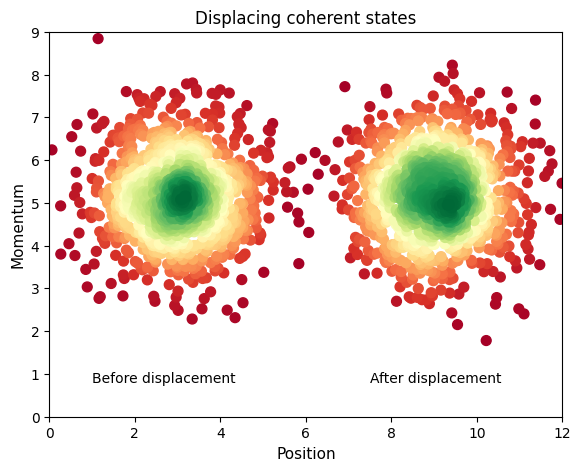

In [22]:
@qml.qnode(dev)
def displace_coherent_x(alpha, phi, x):
    qml.CoherentState(alpha, phi, wires = 0)  # Create coherent state
    qml.Displacement(x, 0, wires = 0)  # Second argument is the displacement direction in phase space
    return qml.sample(qml.X(0))


@qml.qnode(dev)
def displace_coherent_p(alpha, phi, x):
    qml.CoherentState(alpha, phi, wires = 0)
    qml.Displacement(x, 0, wires = 0)
    return qml.sample(qml.P(0))


# We plot both the initial and displaced state
initial_x = displace_coherent_x(3, np.pi / 3, 0)  # initial state amounts to 0 displacement
initial_p = displace_coherent_p(3, np.pi / 3, 0)
displaced_x = displace_coherent_x(3, np.pi / 3, 3)  # displace x=3 in x-direction
displaced_p = displace_coherent_p(3, np.pi / 3, 3)
# Plot as before
fig, ax1 = plt.subplots(figsize=(10, 5))
xp1 = vstack([initial_x, initial_p])
z1 = gaussian_kde(xp1)(xp1)
sorted1 = z1.argsort()
x1, y1, z1 = initial_x[sorted1], initial_p[sorted1], z1[sorted1]
xp2 = vstack([displaced_x, displaced_p])
z2 = gaussian_kde(xp2)(xp2)
sorted2 = z2.argsort()
x2, y2, z2 = displaced_x[sorted2], displaced_p[sorted2], z2[sorted2]
ax1.scatter(x1, y1, c = z1, s = 50, cmap  ="RdYlGn")
ax1.scatter(x2, y2, c = z2, s = 50, cmap = "RdYlGn")
plt.xlim([0, 12])
plt.ylim([0, 9])
ax1.set_aspect("equal", adjustable="box")
plt.text(1, 0.8, "Before displacement")
plt.text(7.5, 0.8, "After displacement")
ax1.set_ylabel("Momentum", fontsize=11)
ax1.set_xlabel("Position", fontsize=11)
ax1.set_title("Displacing coherent states", fontsize=12)
ax1.set_aspect("equal", adjustable = "box")
plt.show()

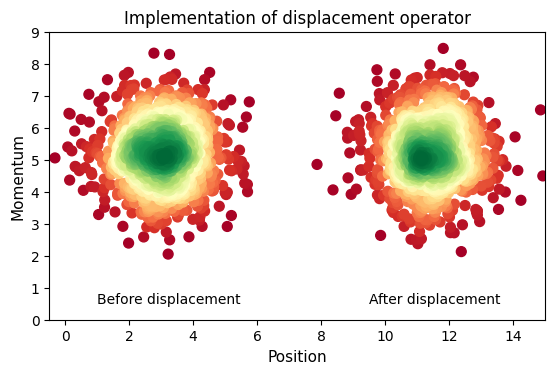

In [23]:
dev2 = qml.device("default.gaussian", wires=2, shots=1000)


@qml.qnode(dev2)
def disp_optics(z, x):
    qml.CoherentState(z, 0, wires = 0)  # High-amplitude auxiliary coherent state
    qml.CoherentState(3, np.pi / 3, wires = 1)  # Input state (e.g. low amplitude coherent state)
    qml.Beamsplitter(np.arccos(1 - x ** 2 / z ** 2), 0, wires=[0, 1])  # Beamsplitter
    return qml.sample(qml.X(1))  # Measure x quadrature


@qml.qnode(dev2)
def mom_optics(z, x):
    qml.CoherentState(z, 0, wires = 0)
    qml.CoherentState(3, np.pi / 3, wires = 1)
    qml.Beamsplitter(np.arccos(1 - x ** 2 / z ** 2), 0, wires = [0, 1])
    return qml.sample(qml.P(1))  # Measure p quadrature


# Plot quadrature measurement before and after implementation of displacement
initial_x = disp_optics(100, 0)  # Initial corresponds to beamsplitter with t=0 (x=0)
initial_p = mom_optics(100, 0)  # Amplitude of coherent state must be large
displaced_x = disp_optics(100, 3)
displaced_p = mom_optics(100, 3)  # Set some non-trivial t
# Plot as before
fig, ax1 = plt.subplots()
xp1 = vstack([initial_x, initial_p])
z1 = gaussian_kde(xp1)(xp1)
sorted1 = z1.argsort()
x1, y1, z1 = initial_x[sorted1], initial_p[sorted1], z1[sorted1]
xp2 = vstack([displaced_x, displaced_p])
z2 = gaussian_kde(xp2)(xp2)
sorted2 = z2.argsort()
x2, y2, z2 = displaced_x[sorted2], displaced_p[sorted2], z2[sorted2]
ax1.scatter(x1, y1, c = z1, s = 50, cmap = "RdYlGn")
ax1.scatter(x2, y2, c = z2, s = 50, cmap = "RdYlGn")
ax1.set_title("Initial", fontsize = 12)
plt.xlim([-0.5, 15])
plt.ylim([0, 9])
ax1.set_ylabel("Momentum", fontsize = 11)
ax1.set_xlabel("Position", fontsize = 11)
plt.text(1, 0.5, "Before displacement")
plt.text(9.5, 0.5, "After displacement")
ax1.set_aspect("equal", adjustable="box")
ax1.set_title("Implementation of displacement operator", fontsize = 12)
plt.show()

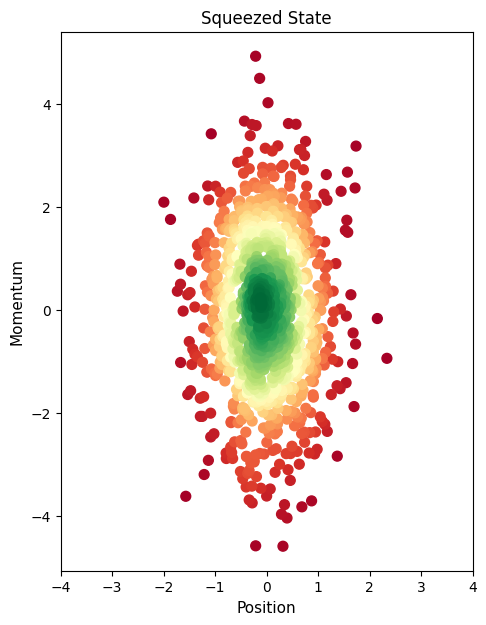

In [24]:
@qml.qnode(dev)
def measure_squeezed_x(r):
    qml.Squeezing(r, 0, wires = 0)
    return qml.sample(qml.X(0))


@qml.qnode(dev)
def measure_squeezed_p(r):
    qml.Squeezing(r, 0, wires = 0)
    return qml.sample(qml.P(0))


# Choose alpha and phi and sample 1000 measurements
x_sample_squeezed = measure_squeezed_x(0.4).numpy()
p_sample_squeezed = measure_squeezed_p(0.4).numpy()

# Plot as before
xp = vstack([x_sample_squeezed, p_sample_squeezed])
z = gaussian_kde(xp)(xp)

sorted_meas = z.argsort()
x, y, z = x_sample_squeezed[sorted_meas], p_sample_squeezed[sorted_meas], z[sorted_meas]

fig, ax1 = plt.subplots(figsize=(7, 7))
ax1.scatter(x, y, c = z, s = 50, cmap = "RdYlGn")
ax1.set_title("Squeezed State", fontsize = 12)
ax1.set_ylabel("Momentum", fontsize = 11)
ax1.set_xlabel("Position", fontsize = 11)
ax1.set_xlim([-4, 4])
ax1.set_aspect("equal", adjustable = "box")
plt.show()

In [25]:
dev3 = qml.device("default.gaussian", wires=1)


@qml.qnode(dev3)
def measure_n_coherent(alpha, phi):
    qml.Squeezing(alpha, phi, wires = 0)
    return qml.expval(qml.NumberOperator(0))


coherent_expval = measure_n_coherent(1, np.pi / 3)
print("Expected number of photons: {}".format(coherent_expval))

Expected number of photons: 1.3810978455418157


In [26]:
dev_exact2 = qml.device("default.gaussian", wires = 2)


@qml.qnode(dev_exact2)
def measurement(a, phi):
    qml.Displacement(a, phi, wires = 0)  # Implement displacement using PennyLane
    return qml.expval(qml.X(0))


@qml.qnode(dev_exact2)
def measurement2(a, theta, alpha, phi):
    qml.Displacement(a, theta, wires = 0)  # We choose the initial to be a displaced vacuum
    qml.CoherentState(alpha, phi, wires = 1)  # Prepare coherent as second qumode
    qml.Beamsplitter(np.pi / 4, 0, wires=[0, 1])  # Interfere both states
    return qml.expval(qml.NumberOperator(0)), qml.expval(qml.NumberOperator(1))  # Read out N


print(
    "Expectation value of x-quadrature after displacement: {}\n".format(measurement(3, 0).numpy())
)
print("Expected current in each detector:")
print("Detector 1: {}".format(measurement2(3, 0, 1, 0)[0].numpy()))
print("Detector 2: {}".format(measurement2(3, 0, 1, 0)[1].numpy()))
print(
    "Difference between currents: {}".format(
        measurement2(3, 0, 1, 0)[1].numpy() - measurement2(3, 0, 1, 0)[0].numpy()
    )
)

Expectation value of x-quadrature after displacement: 6.0

Expected current in each detector:
Detector 1: 2.000000000000001
Detector 2: 7.999999999999998
Difference between currents: 5.999999999999997


In [27]:
#Original Copyright © 2022, Xanadu Quantum Technologies, Inc, executed by vijaymohire 
#Used for non-commercial educational purpose only. More details at: https://pennylane.ai/qml/demos/tutorial_photonics.html 